In [1]:
ls

Model1_Engagement_Classification.ipynb  data_engagement_classification.csv


In [3]:
import pandas as pd

In [50]:
data = pd.read_csv("data_engagement_classification.csv")

In [51]:
del data['Unnamed: 0']

In [52]:
data.head()

user_id  is_fraudster profile_gender  profile_age profile_has_children  \
0  34245751354             1         female         33.0                 True   
1  28697635187             0        unknown          NaN              unknown   
2  29005152258             0        unknown         32.0              unknown   
3  28846430713             0         female         52.0              unknown   
4  29200831573             0           male         45.0                 True   

  profile_home_owner_status profile_postal_code       profile_ethnicity  \
0                home_owner             38305.0  black_african_american   
1                   unknown             98012.0                 unknown   
2                   unknown             unknown                 unknown   
3                    renter             60162.0  black_african_american   
4                home_owner             unknown  black_african_american   

  profile_has_linked_cards profile_household_income  \
0                     True            75,000-99,999   
1                  unknown                  unknown   
2                  unknown                  unknown   
3                     True            75,000-99,999   
4                  unknown            60,000-74,999   

  profile_relationship_status  signup_period Is_Engaged_30  
0    married_domestic_partner            133           yes  
1                     unknown            397            no  
2                     unknown            335            no  
3                    divorced            366           yes  
4                     unknown            314            no

In [53]:
data.columns

Index([u'user_id', u'is_fraudster', u'profile_gender', u'profile_age',
       u'profile_has_children', u'profile_home_owner_status',
       u'profile_postal_code', u'profile_ethnicity',
       u'profile_has_linked_cards', u'profile_household_income',
       u'profile_relationship_status', u'signup_period', u'Is_Engaged_30'],
      dtype='object')

In [54]:
data.shape

(34598, 13)

In [55]:
data['Is_Engaged_30'].value_counts()

no     26424
yes     8174
Name: Is_Engaged_30, dtype: int64

In [11]:
8174.0/data.shape[0]

0.23625643100757268

In [49]:
data.dtypes

is_fraudster                   category
profile_gender                 category
profile_age                     float64
profile_has_children           category
profile_home_owner_status      category
profile_postal_code            category
profile_ethnicity              category
profile_has_linked_cards       category
profile_household_income       category
profile_relationship_status    category
signup_period                     int64
Is_Engaged_30                  category
dtype: object

In [35]:
data['is_fraudster'] = data['is_fraudster'].astype('category')

In [37]:
data['profile_age'].unique()

array([  33.,   nan,   32.,   52.,   45.,   40.,   66.,   58.,   57.,
         30.,   25.,   61.,   59.,   29.,   46.,   27.,   41.,   48.,
         35.,   20.,   55.,   42.,   34.,   54.,   67.,   36.,   47.,
         50.,   44.,   43.,   56.,   38.,   68.,   31.,   49.,   24.,
         65.,   51.,   63.,   62.,   69.,   53.,   39.,   72.,   70.,
         80.,   60.,   21.,   37.,   28.,   22.,   83.,   75.,   64.,
         77.,   73.,   88.,   18.,   26.,   23.,  118.,   76.,   71.,
         19.,   14.,   81.,   15.,   13.,   16.,   17.,   74.,   78.,
         99.,   79.,  117.,   94.,   82.,   85.])

In [12]:
input_variables = ['is_fraudster',
 'profile_gender',
 'profile_age',
 'profile_has_children',
 'profile_home_owner_status',
 'profile_postal_code',
 'profile_ethnicity',
 'profile_has_linked_cards',
 'profile_household_income',
 'profile_relationship_status',
 'signup_period']

In [13]:
output_variable = ['Is_Engaged_30']

In [14]:
input_categorical_variables = ['is_fraudster',
 'profile_gender',
 'profile_has_children',
 'profile_home_owner_status',
 'profile_postal_code',
 'profile_ethnicity',
 'profile_has_linked_cards',
 'profile_household_income',
 'profile_relationship_status']

In [15]:
input_cont_variable = ['profile_age', 'signup_period']

In [39]:
# Convert Object type to Categorical Variable

In [56]:
for cat in input_categorical_variables:
    data[cat] = data[cat].astype('category')

In [57]:
data['Is_Engaged_30'] = data['Is_Engaged_30'].astype('category')

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 13 columns):
user_id                        34598 non-null int64
is_fraudster                   34598 non-null category
profile_gender                 34598 non-null category
profile_age                    34598 non-null float64
profile_has_children           34598 non-null category
profile_home_owner_status      34598 non-null category
profile_postal_code            34598 non-null category
profile_ethnicity              34598 non-null category
profile_has_linked_cards       34598 non-null category
profile_household_income       34598 non-null category
profile_relationship_status    34598 non-null category
signup_period                  34598 non-null int64
Is_Engaged_30                  34598 non-null category
dtypes: category(10), float64(1), int64(2)
memory usage: 1.5 MB


In [59]:
data.describe()

user_id   profile_age  signup_period
count  3.459800e+04  31315.000000   34598.000000
mean   3.325910e+10     37.682197     191.115267
std    4.323899e+09     12.482230     115.699112
min    2.853474e+10     13.000000       1.000000
25%    2.936947e+10     28.000000      92.000000
50%    3.028563e+10     36.000000     165.000000
75%    3.834040e+10     46.000000     280.000000
max    3.905453e+10    118.000000     424.000000

In [46]:
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt

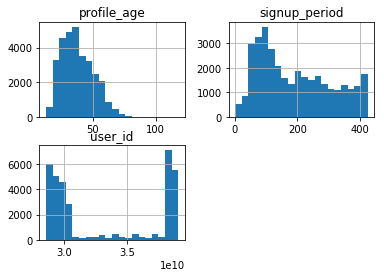

In [60]:
data.hist(bins=20)
plt.show()

In [62]:
data['Is_Engaged_30'].value_counts()

no     26424
yes     8174
Name: Is_Engaged_30, dtype: int64

In [63]:
8174.0/(8174 + 26424)

0.23625643100757268

# Imputing Missing Value 

In [145]:
from sklearn.preprocessing import Imputer

In [146]:
imputer = Imputer(strategy = "median")

In [170]:
imputer.fit(data['profile_age'].values.reshape(-1, 1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [149]:
imputer.statistics_

array([ 36.])

In [150]:
data['profile_age'].describe()

count    31315.000000
mean        37.682197
std         12.482230
min         13.000000
25%         28.000000
50%         36.000000
75%         46.000000
max        118.000000
Name: profile_age, dtype: float64

In [168]:
age = imputer.transform(data['profile_age'].values.reshape(-1, 1))

In [177]:
(age.reshape(1,-1)[0]).shape

(34598,)

In [166]:
age.shape

(34598, 1)

In [167]:
age[:10]

array([[ 33.],
       [ 36.],
       [ 32.],
       [ 52.],
       [ 45.],
       [ 36.],
       [ 36.],
       [ 36.],
       [ 36.],
       [ 40.]])

In [157]:
data['profile_age'][:10]

0    33.0
1     NaN
2    32.0
3    52.0
4    45.0
5     NaN
6     NaN
7     NaN
8     NaN
9    40.0
Name: profile_age, dtype: float64

In [178]:
data['profile_age'] = pd.Series(age.reshape(1,-1)[0])

In [179]:
data.head()

user_id is_fraudster profile_gender  profile_age profile_has_children  \
0  34245751354            1         female         33.0                 True   
1  28697635187            0        unknown         36.0              unknown   
2  29005152258            0        unknown         32.0              unknown   
3  28846430713            0         female         52.0              unknown   
4  29200831573            0           male         45.0                 True   

  profile_home_owner_status profile_postal_code       profile_ethnicity  \
0                home_owner             38305.0  black_african_american   
1                   unknown             98012.0                 unknown   
2                   unknown             unknown                 unknown   
3                    renter             60162.0  black_african_american   
4                home_owner             unknown  black_african_american   

  profile_has_linked_cards profile_household_income  \
0                     True            75,000-99,999   
1                  unknown                  unknown   
2                  unknown                  unknown   
3                     True            75,000-99,999   
4                  unknown            60,000-74,999   

  profile_relationship_status  signup_period Is_Engaged_30  
0    married_domestic_partner            133           yes  
1                     unknown            397            no  
2                     unknown            335            no  
3                    divorced            366           yes  
4                     unknown            314            no

# Encoding Categorical Variables 

In [180]:
from sklearn.preprocessing import LabelBinarizer

In [181]:
encoder = LabelBinarizer()

In [196]:
encodings = {}

In [197]:
lb_target = encoder.fit(data['Is_Engaged_30'])

In [198]:
lb_target.classes_

array(['no', 'yes'],
      dtype='|S3')

In [199]:
encodings['lb_target'] = lb_target

In [231]:
input_categorical_variables

['is_fraudster',
 'profile_gender',
 'profile_has_children',
 'profile_home_owner_status',
 'profile_postal_code',
 'profile_ethnicity',
 'profile_has_linked_cards',
 'profile_household_income',
 'profile_relationship_status']

In [233]:
encodings = {}
for cat in input_categorical_variables:
    encoder = LabelBinarizer()
    l = "lb_" + cat
    print l
    l = encoder.fit(data[cat])
    print l.classes_ , len(l.classes_)
    encodings["lb_" + cat] = l

lb_is_fraudster
[0 1] 2
lb_profile_gender
['female' 'male' 'unknown'] 3
lb_profile_has_children
['True' 'unknown'] 2
lb_profile_home_owner_status
['home_owner' 'renter' 'unknown'] 3
lb_profile_postal_code
['0.0' '10001.0' '10002.0' ..., '99654.0' '99703.0' 'unknown'] 6946
lb_profile_ethnicity
['asian' 'black_african_american' 'hispanic' 'middle_eastern'
 'native_american' 'other' 'unknown' 'white_caucasian'] 8
lb_profile_has_linked_cards
['True' 'unknown'] 2
lb_profile_household_income
['0-14,999' '100,000-124,999' '125,000-149,999' '15,000-19,999'
 '150,000-199,999' '20,000-29,999' '200,000-249,999' '250,000-399,999'
 '30,000-39,999' '40,000-49,999' '400,000-499,999' '50,000-59,999'
 '500,000+' '60,000-74,999' '75,000-99,999' 'unknown'] 16
lb_profile_relationship_status
['divorced' 'married_domestic_partner' 'separated' 'single_never_married'
 'unknown' 'widowed'] 6


# Encoding Labels 

In [225]:
encodings.keys()

['lb_profile_home_owner_status',
 'lb_profile_has_linked_cards',
 'lb_target',
 'lb_profile_relationship_status',
 'lb_profile_gender',
 'lb_profile_has_children',
 'lb_profile_household_income',
 'lb_is_fraudster',
 'lb_profile_ethnicity',
 'lb_profile_postal_code']

In [272]:
dfs.columns

Index([u'is_fraudster1', u'profile_gender1', u'profile_gender2',
       u'profile_gender3', u'profile_has_children1',
       u'profile_home_owner_status1', u'profile_home_owner_status2',
       u'profile_home_owner_status3', u'profile_postal_code1',
       u'profile_postal_code2',
       ...
       u'profile_household_income16', u'profile_relationship_status1',
       u'profile_relationship_status2', u'profile_relationship_status3',
       u'profile_relationship_status4', u'profile_relationship_status5',
       u'profile_relationship_status6', u'profile_age',
       u'profile_signup_period', u'user_id'],
      dtype='object', length=6988)

In [274]:
list(data.columns)

['user_id',
 'is_fraudster',
 'profile_gender',
 'profile_age',
 'profile_has_children',
 'profile_home_owner_status',
 'profile_postal_code',
 'profile_ethnicity',
 'profile_has_linked_cards',
 'profile_household_income',
 'profile_relationship_status',
 'signup_period',
 'Is_Engaged_30']

In [275]:
encoder = LabelBinarizer()
labels = encoder.fit_transform(data['Is_Engaged_30'])

In [276]:
labels

array([[1],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]])

In [234]:
for k in encodings:
    print encodings[k].classes_

['home_owner' 'renter' 'unknown']
['True' 'unknown']
['divorced' 'married_domestic_partner' 'separated' 'single_never_married'
 'unknown' 'widowed']
['female' 'male' 'unknown']
['True' 'unknown']
['0-14,999' '100,000-124,999' '125,000-149,999' '15,000-19,999'
 '150,000-199,999' '20,000-29,999' '200,000-249,999' '250,000-399,999'
 '30,000-39,999' '40,000-49,999' '400,000-499,999' '50,000-59,999'
 '500,000+' '60,000-74,999' '75,000-99,999' 'unknown']
[0 1]
['asian' 'black_african_american' 'hispanic' 'middle_eastern'
 'native_american' 'other' 'unknown' 'white_caucasian']
['0.0' '10001.0' '10002.0' ..., '99654.0' '99703.0' 'unknown']


In [227]:
rel = encodings['lb_profile_relationship_status'].transform(data['profile_relationship_status'])

In [228]:
rel.shape

(34598, 6)

In [211]:
data['profile_relationship_status'].unique().shape[0]

6

In [255]:
dfs.head()

is_fraudster1  profile_gender1  profile_gender2  profile_gender3  \
0              1                1                0                0   
1              0                0                0                1   
2              0                0                0                1   
3              0                1                0                0   
4              0                0                1                0   

   profile_has_children1  profile_home_owner_status1  \
0                      0                           1   
1                      1                           0   
2                      1                           0   
3                      1                           0   
4                      0                           1   

   profile_home_owner_status2  profile_home_owner_status3  \
0                           0                           0   
1                           0                           1   
2                           0                           1   
3                           1                           0   
4                           0                           0   

   profile_postal_code1  profile_postal_code2              ...               \
0                     0                     0              ...                
1                     0                     0              ...                
2                     0                     0              ...                
3                     0                     0              ...                
4                     0                     0              ...                

   profile_household_income13  profile_household_income14  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   profile_household_income15  profile_household_income16  \
0                           1                           0   
1                           0                           1   
2                           0                           1   
3                           1                           0   
4                           0                           0   

   profile_relationship_status1  profile_relationship_status2  \
0                             0                             1   
1                             0                             0   
2                             0                             0   
3                             1                             0   
4                             0                             0   

   profile_relationship_status3  profile_relationship_status4  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   profile_relationship_status5  profile_relationship_status6  
0                             0                             0  
1                             1                             0  
2                             1                             0  
3                             0                             0  
4                             1                             0  

[5 rows x 6985 columns]

In [256]:
dfs.values.shape

(34598, 6985)

# Creating One-Hot Encoding for Categorical Variables

In [254]:
dfs =  pd.DataFrame()
for cat in input_categorical_variables:
    rel = encodings["lb_"+ cat].transform(data[cat])
    print rel.shape
    for i in range(rel.shape[1]):
        dfs[cat + str(i+1)] = rel[:,i]

(34598, 1)
(34598, 3)
(34598, 1)
(34598, 3)
(34598, 6946)
(34598, 8)
(34598, 1)
(34598, 16)
(34598, 6)


In [257]:
list(dfs.columns)

['is_fraudster1',
 'profile_gender1',
 'profile_gender2',
 'profile_gender3',
 'profile_has_children1',
 'profile_home_owner_status1',
 'profile_home_owner_status2',
 'profile_home_owner_status3',
 'profile_postal_code1',
 'profile_postal_code2',
 'profile_postal_code3',
 'profile_postal_code4',
 'profile_postal_code5',
 'profile_postal_code6',
 'profile_postal_code7',
 'profile_postal_code8',
 'profile_postal_code9',
 'profile_postal_code10',
 'profile_postal_code11',
 'profile_postal_code12',
 'profile_postal_code13',
 'profile_postal_code14',
 'profile_postal_code15',
 'profile_postal_code16',
 'profile_postal_code17',
 'profile_postal_code18',
 'profile_postal_code19',
 'profile_postal_code20',
 'profile_postal_code21',
 'profile_postal_code22',
 'profile_postal_code23',
 'profile_postal_code24',
 'profile_postal_code25',
 'profile_postal_code26',
 'profile_postal_code27',
 'profile_postal_code28',
 'profile_postal_code29',
 'profile_postal_code30',
 'profile_postal_code31',
 'prof

# Standardising Numerical variables 

In [262]:
dfs['profile_age'] = data['profile_age']/120

In [263]:
dfs['profile_signup_period'] = data['signup_period']/500

In [268]:
dfs['user_id'] = data['user_id']

# Adding Target Variable 

In [277]:
dfs['target'] = labels

In [278]:
dfs.head()

is_fraudster1  profile_gender1  profile_gender2  profile_gender3  \
0              1                1                0                0   
1              0                0                0                1   
2              0                0                0                1   
3              0                1                0                0   
4              0                0                1                0   

   profile_has_children1  profile_home_owner_status1  \
0                      0                           1   
1                      1                           0   
2                      1                           0   
3                      1                           0   
4                      0                           1   

   profile_home_owner_status2  profile_home_owner_status3  \
0                           0                           0   
1                           0                           1   
2                           0                           1   
3                           1                           0   
4                           0                           0   

   profile_postal_code1  profile_postal_code2   ...    \
0                     0                     0   ...     
1                     0                     0   ...     
2                     0                     0   ...     
3                     0                     0   ...     
4                     0                     0   ...     

   profile_relationship_status1  profile_relationship_status2  \
0                             0                             1   
1                             0                             0   
2                             0                             0   
3                             1                             0   
4                             0                             0   

   profile_relationship_status3  profile_relationship_status4  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   profile_relationship_status5  profile_relationship_status6  profile_age  \
0                             0                             0     0.275000   
1                             1                             0     0.300000   
2                             1                             0     0.266667   
3                             0                             0     0.433333   
4                             1                             0     0.375000   

   profile_signup_period      user_id  target  
0                  0.266  34245751354       1  
1                  0.794  28697635187       0  
2                  0.670  29005152258       0  
3                  0.732  28846430713       1  
4                  0.628  29200831573       0  

[5 rows x 6989 columns]

In [265]:
dfs.

(34598, 6987)

# Train - Test Split 

Since data is not balanced since only 24% people are engaged we are using  equal balance for training. 

In [64]:
userid_yes = data[data['Is_Engaged_30'] == 'yes']['user_id']

In [65]:
len(userid_yes)

8174

In [66]:
type(userid_yes)

pandas.core.series.Series

In [68]:
userid_no = data[data['Is_Engaged_30'] == 'no']['user_id']

In [69]:
userid_no.shape

(26424,)

In [70]:
# Splitting - Test and Train 

In [72]:
import numpy as np

In [94]:
userid_yes_shuffled = userid_yes.iloc[list(np.random.permutation(len(userid_yes)))]

In [96]:
userid_yes_shuffled.shape == userid_yes.shape

True

In [98]:
userid_No_shuffled = userid_no.iloc[list(np.random.permutation(len(userid_no)))]

In [99]:
userid_No_shuffled.shape

(26424,)

In [76]:
# Train Data will have equal number of yes-no

In [100]:
train_data_len = int(0.70 * len(userid_yes_shuffled))

In [101]:
train_data_len

5721

In [ ]:
# splitting Test and Train Data

In [109]:
train_yes = userid_yes_shuffled.iloc[:train_data_len]

In [110]:
train_no = userid_No_shuffled.iloc[:train_data_len]

In [111]:
test_yes = userid_yes_shuffled.iloc[train_data_len:]

In [132]:
test_no = userid_No_shuffled.iloc[train_data_len:]

# Partitioning dataset

In [122]:
data_train_yes = data[data['user_id'].isin(list(train_yes))]

In [279]:
train = list(train_yes) + list(train_no)

In [282]:
test = list(test_yes) + list(test_no)

In [281]:
len(train)

11442

In [123]:
data_train_yes.shape

(5721, 13)

In [124]:
data_train_yes.head()

user_id is_fraudster profile_gender  profile_age profile_has_children  \
3   28846430713            0         female         52.0              unknown   
13  35440833373            0         female         57.0                 True   
15  28786930500            0         female         57.0              unknown   
17  28788926861            0         female         61.0              unknown   
19  36271701851            1           male         29.0              unknown   

   profile_home_owner_status profile_postal_code       profile_ethnicity  \
3                     renter             60162.0  black_african_american   
13                home_owner             38917.0         native_american   
15                home_owner             78726.0  black_african_american   
17                home_owner             62269.0         white_caucasian   
19                   unknown             36109.0                 unknown   

   profile_has_linked_cards profile_household_income  \
3                      True            75,000-99,999   
13                  unknown          150,000-199,999   
15                     True          100,000-124,999   
17                     True            60,000-74,999   
19                     True                  unknown   

   profile_relationship_status  signup_period Is_Engaged_30  
3                     divorced            366           yes  
13    married_domestic_partner            127           yes  
15                     widowed            378           yes  
17    married_domestic_partner            376           yes  
19                     unknown            124           yes

In [125]:
data_train_yes.columns

Index([u'user_id', u'is_fraudster', u'profile_gender', u'profile_age',
       u'profile_has_children', u'profile_home_owner_status',
       u'profile_postal_code', u'profile_ethnicity',
       u'profile_has_linked_cards', u'profile_household_income',
       u'profile_relationship_status', u'signup_period', u'Is_Engaged_30'],
      dtype='object')

In [137]:
data_train_yes.shape

(5721, 13)

In [126]:
data_train_no = data[data['user_id'].isin(list(train_no))]

In [127]:
data_train_no.columns

Index([u'user_id', u'is_fraudster', u'profile_gender', u'profile_age',
       u'profile_has_children', u'profile_home_owner_status',
       u'profile_postal_code', u'profile_ethnicity',
       u'profile_has_linked_cards', u'profile_household_income',
       u'profile_relationship_status', u'signup_period', u'Is_Engaged_30'],
      dtype='object')

In [136]:
data_train_no.shape

(5721, 13)

In [133]:
data_test_no = data[data['user_id'].isin(list(test_no))]

In [134]:
data_test_no.shape

(20703, 13)

In [135]:
data_test_yes = data[data['user_id'].isin(list(test_yes))]

In [131]:
data_test_yes.shape

(2453, 13)

In [138]:
data_train_yes.to_csv("data_train_yes.csv")

In [139]:
data_train_no.to_csv("data_train_no.csv")

In [140]:
data_test_yes.to_csv("data_test_yes.csv")

In [141]:
data_test_no.to_csv("data_test_no.csv")

# Splitting Train and Test data 

In [284]:
data_train = dfs[dfs['user_id'].isin(list(train))]

In [285]:
data_train.head()

is_fraudster1  profile_gender1  profile_gender2  profile_gender3  \
3               0                1                0                0   
5               0                0                0                1   
9               0                0                1                0   
13              0                1                0                0   
15              0                1                0                0   

    profile_has_children1  profile_home_owner_status1  \
3                       1                           0   
5                       1                           0   
9                       0                           1   
13                      0                           1   
15                      1                           1   

    profile_home_owner_status2  profile_home_owner_status3  \
3                            1                           0   
5                            0                           1   
9                            0                           0   
13                           0                           0   
15                           0                           0   

    profile_postal_code1  profile_postal_code2   ...    \
3                      0                     0   ...     
5                      0                     0   ...     
9                      0                     0   ...     
13                     0                     0   ...     
15                     0                     0   ...     

    profile_relationship_status1  profile_relationship_status2  \
3                              1                             0   
5                              0                             0   
9                              0                             0   
13                             0                             1   
15                             0                             0   

    profile_relationship_status3  profile_relationship_status4  \
3                              0                             0   
5                              0                             0   
9                              0                             0   
13                             0                             0   
15                             0                             0   

    profile_relationship_status5  profile_relationship_status6  profile_age  \
3                              0                             0     0.433333   
5                              1                             0     0.300000   
9                              1                             0     0.333333   
13                             0                             0     0.475000   
15                             0                             1     0.475000   

    profile_signup_period      user_id  target  
3                   0.732  28846430713       1  
5                   0.746  28801780046       0  
9                   0.666  29020391068       0  
13                  0.254  35440833373       1  
15                  0.756  28786930500       1  

[5 rows x 6989 columns]

In [286]:
data_test = dfs[dfs['user_id'].isin(list(test))]

In [287]:
data_test.shape

(23156, 6989)

In [288]:
data_train.to_csv("train_data_encoded.csv")

In [289]:
data_test.to_csv("test_data_encoded.csv")

# Creating np array of input and target

In [294]:
Y_train = data_train['target'].values

In [295]:
type(Y_train)

numpy.ndarray

In [296]:
Y_test = data_test['target'].values

In [297]:
Y_train.shape

(11442,)

In [298]:
Y_test.shape

(23156,)

In [322]:
X_train = data_train.drop(['user_id','target'],axis=1).values

In [323]:
X_train.shape

(11442, 6987)

In [324]:
X_test = data_test.drop(['user_id','target'],axis=1).values

In [325]:
X_test.shape

(23156, 6987)

# Data with Postal - Code removed 

In [312]:
dfs_without_postal_code = dfs [['is_fraudster1',
 'profile_gender1',
 'profile_gender2',
 'profile_gender3',
 'profile_has_children1',
 'profile_home_owner_status1',
 'profile_home_owner_status2',
 'profile_home_owner_status3',
 'profile_ethnicity1',
 'profile_ethnicity2',
 'profile_ethnicity3',
 'profile_ethnicity4',
 'profile_ethnicity5',
 'profile_ethnicity6',
 'profile_ethnicity7',
 'profile_ethnicity8',
 'profile_has_linked_cards1',
 'profile_household_income1',
 'profile_household_income2',
 'profile_household_income3',
 'profile_household_income4',
 'profile_household_income5',
 'profile_household_income6',
 'profile_household_income7',
 'profile_household_income8',
 'profile_household_income9',
 'profile_household_income10',
 'profile_household_income11',
 'profile_household_income12',
 'profile_household_income13',
 'profile_household_income14',
 'profile_household_income15',
 'profile_household_income16',
 'profile_relationship_status1',
 'profile_relationship_status2',
 'profile_relationship_status3',
 'profile_relationship_status4',
 'profile_relationship_status5',
 'profile_relationship_status6',
 'profile_age',
 'profile_signup_period',
 'user_id',
 'target']]

In [313]:
dfs_without_postal_code.shape

(34598, 43)

In [314]:
data_train_postal = dfs_without_postal_code[dfs_without_postal_code['user_id'].isin(list(train))]

In [315]:
data_test_postal = dfs_without_postal_code[dfs_without_postal_code['user_id'].isin(list(test))]

In [320]:
X_test_postal = data_test_postal.drop(['user_id','target'],axis=1).values

In [321]:
X_train_postal = data_train_postal.drop(['user_id','target'],axis=1).values

In [327]:
X_test_postal.shape

(23156, 41)

In [328]:
X_train_postal.shape

(11442, 41)

#    Model 1 - SGD Classifier

In [329]:
from sklearn.linear_model import SGDClassifier

In [517]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [518]:
y_pred = sgd_clf.predict(X_test)

In [519]:
sum(y_pred == Y_test)

10564

In [520]:
10564.0/len(y_pred)

0.4562100535498359

In [521]:
report = classification_report(Y_test, y_pred)
print report 

             precision    recall  f1-score   support

          0       0.92      0.43      0.59     20703
          1       0.12      0.66      0.21      2453

avg / total       0.83      0.46      0.55     23156



# Confusion matrix and Precision and Recall

In [368]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [335]:
precision_score(Y_test,y_pred)

0.12170733527348705

In [336]:
recall_score(Y_test,y_pred)

0.66490012229922546

In [516]:
report = classification_report(Y_test, y_pred)
print report 

             precision    recall  f1-score   support

          0       0.91      0.77      0.83     20703
          1       0.16      0.37      0.22      2453

avg / total       0.83      0.73      0.77     23156



In [ ]:
classification_report

# Model with Postal code Removed 

In [330]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_postal, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [337]:
y_pred_postal = sgd_clf.predict(X_test_postal)

In [349]:
float(sum(( y_pred_postal== Y_test)))/len(Y_test)

0.404603558472966

In [338]:
precision_score(Y_test,y_pred_postal)

0.1199195171026157

In [339]:
recall_score(Y_test,y_pred_postal)

0.72890338361190377

# Random Forest Classifier 

In [522]:
from sklearn.ensemble import RandomForestClassifier

In [523]:
rf_clf = RandomForestClassifier(random_state=0)

In [524]:
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [346]:
y_pred = rf_clf.predict(X_test)

In [525]:
report = classification_report(Y_test, y_pred)
print report 

             precision    recall  f1-score   support

          0       0.92      0.43      0.59     20703
          1       0.12      0.66      0.21      2453

avg / total       0.83      0.46      0.55     23156



In [347]:
precision_score(Y_test,y_pred)

0.14525810324129651

In [348]:
recall_score(Y_test,y_pred)

0.54260089686098656

In [350]:
float(sum(( y_pred == Y_test)))/len(Y_test)

0.61331836241147

In [352]:
from sklearn.grid_search import GridSearchCV

/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [354]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, Y_train)
print CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 200}


In [355]:
y_pred = CV_rfc.predict(X_test)

In [356]:
precision_score(Y_test,y_pred)

0.14752798969582878

In [358]:
recall_score(Y_test,y_pred)

0.60701182225845907

In [357]:
float(sum(( y_pred == Y_test)))/len(Y_test)

0.5868025565728106

#                                    SVM 

In [359]:
from sklearn import svm

In [360]:
svc_clf = svm.SVC()

In [361]:
svc_clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [362]:
y_pred = svc_clf.predict(X_test)

In [363]:
recall_score(Y_test,y_pred)

0.40399510803098249

In [364]:
precision_score(Y_test,y_pred)

0.15782767956681001

  # Naive - Bayes

In [546]:
from sklearn.naive_bayes import GaussianNB

In [547]:
bayes_clf  = GaussianNB()

In [548]:
bayes_clf.fit(X_train, Y_train)

GaussianNB(priors=None)

In [549]:
y_pred = bayes_clf.predict(X_test)

In [550]:
float(sum(( y_pred== Y_test)))/len(Y_test)

0.8472965969942995

In [545]:
print classification_report(Y_test,y_pred)

             precision    recall  f1-score   support

          0       0.90      0.94      0.92     20703
          1       0.15      0.10      0.12      2453

avg / total       0.82      0.85      0.83     23156



#                               KNN

In [371]:
from sklearn import neighbors

In [530]:
knn_clf = neighbors.KNeighborsClassifier()

In [531]:
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [532]:
y_pred = knn_clf.predict(X_test)

In [533]:
float(sum(( y_pred== Y_test)))/len(Y_test)

0.5726377612713768

In [534]:
report = classification_report(Y_test, y_pred)
print report 

             precision    recall  f1-score   support

          0       0.92      0.57      0.71     20703
          1       0.13      0.56      0.22      2453

avg / total       0.83      0.57      0.65     23156



In [375]:
recall_score(Y_test,y_pred)

0.5605381165919282

In [376]:
precision_score(Y_test,y_pred)

0.13489649759638969

#                    Logistic Regression

In [377]:
from sklearn.linear_model import LogisticRegression

In [526]:
logistic_clf = LogisticRegression()

In [527]:
logistic_clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [539]:
y_pred = logistic_clf.predict(X_test)

In [540]:
float(sum(( y_pred== Y_test)))/len(Y_test)

0.6056313698393505

In [528]:
report = classification_report(Y_test, y_pred)
print report 

             precision    recall  f1-score   support

          0       0.92      0.43      0.59     20703
          1       0.12      0.66      0.21      2453

avg / total       0.83      0.46      0.55     23156



In [381]:
recall_score(Y_test,y_pred)

0.59518956379942922

In [382]:
precision_score(Y_test,y_pred)

0.15209917699760392

#        Linear SVM 

In [383]:
from sklearn.svm import LinearSVC

In [535]:
linear_svm_clf = LinearSVC()

In [536]:
linear_svm_clf.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [541]:
y_pred = linear_svm_clf.predict(X_test)

In [542]:
float(sum(( y_pred== Y_test)))/len(Y_test)

0.6200984626014856

In [538]:
report = classification_report(Y_test, y_pred)
print report 

             precision    recall  f1-score   support

          0       0.92      0.63      0.75     20703
          1       0.15      0.55      0.23      2453

avg / total       0.84      0.62      0.69     23156



In [387]:
recall_score(Y_test,y_pred)

0.54830819404810438

In [388]:
precision_score(Y_test,y_pred)

0.14888200132831525

In [389]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [390]:
sum(y_pred)

9034

In [391]:
len(y_pred)

23156

In [392]:
9034.0/23156

0.3901364657108309

#                       DL Based Models - one-Hot Encoding

# Model 1 - MLP

In [393]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [436]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(1, activation='sigmoid'))

In [437]:
network.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [438]:
network.fit(X_train, Y_train, epochs=10, batch_size=128)

Epoch 1/10
11442/11442 [==============================] - 9s 803us/step - loss: 0.6768 - acc: 0.5641
Epoch 2/10
11442/11442 [==============================] - 10s 836us/step - loss: 0.6387 - acc: 0.6210
Epoch 3/10
11442/11442 [==============================] - 8s 728us/step - loss: 0.5858 - acc: 0.6742
Epoch 4/10
11442/11442 [==============================] - 9s 783us/step - loss: 0.5297 - acc: 0.7082
Epoch 5/10
11442/11442 [==============================] - 9s 782us/step - loss: 0.4928 - acc: 0.7169
Epoch 6/10
11442/11442 [==============================] - 7s 624us/step - loss: 0.4665 - acc: 0.7250
Epoch 7/10
11442/11442 [==============================] - 7s 640us/step - loss: 0.4536 - acc: 0.7362
Epoch 8/10
11442/11442 [==============================] - 7s 612us/step - loss: 0.4434 - acc: 0.7399
Epoch 9/10
11442/11442 [==============================] - 7s 618us/step - loss: 0.4341 - acc: 0.7456
Epoch 10/10
11442/11442 [==============================] - 7s 606us/step - loss: 0.4260 - 

In [473]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               3577856   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 3,578,369
Trainable params: 3,578,369
Non-trainable params: 0
_________________________________________________________________


In [439]:
test_loss, test_acc = network.evaluate(X_test,Y_test)
print'test_acc:', test_acc

23156/23156 [==============================] - 7s 306us/step
test_acc: 0.748402141983


In [440]:
test_loss

0.73307849040281015

In [441]:
y_pred = network.predict(X_test)
y_pred = np.array([1 if i >=0.50 else 0 for i in y_pred.reshape(1,-1)[0] ]) 
report = classification_report(Y_test, y_pred)

In [442]:
print report

             precision    recall  f1-score   support

          0       0.91      0.79      0.85     20703
          1       0.18      0.38      0.24      2453

avg / total       0.84      0.75      0.78     23156



#                           Model 2 - 1D CNN

In [448]:

from keras.layers import Conv1D, Dense, MaxPooling1D,GlobalMaxPooling1D
from keras.models import Sequential

In [449]:
model = Sequential()
model.add(layers.Conv1D(32, 7, activation='relu',input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [452]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [454]:
X = np.atleast_3d(X_train)

In [455]:
X.shape

(11442, 6987, 1)

In [456]:
model.fit(np.atleast_3d(X_train), Y_train, epochs=10, batch_size=128)

Epoch 1/10
11442/11442 [==============================] - 44s 4ms/step - loss: 0.7965 - acc: 0.5022
Epoch 2/10
11442/11442 [==============================] - 45s 4ms/step - loss: 0.6874 - acc: 0.5455
Epoch 3/10
11442/11442 [==============================] - 45s 4ms/step - loss: 0.6836 - acc: 0.5642
Epoch 4/10
11442/11442 [==============================] - 45s 4ms/step - loss: 0.6819 - acc: 0.5647
Epoch 5/10
11442/11442 [==============================] - 44s 4ms/step - loss: 0.6827 - acc: 0.5685
Epoch 6/10
11442/11442 [==============================] - 47s 4ms/step - loss: 0.6813 - acc: 0.5683
Epoch 7/10
11442/11442 [==============================] - 44s 4ms/step - loss: 0.6805 - acc: 0.5677
Epoch 8/10
11442/11442 [==============================] - 43s 4ms/step - loss: 0.6800 - acc: 0.5698
Epoch 9/10
11442/11442 [==============================] - 44s 4ms/step - loss: 0.6807 - acc: 0.5705
Epoch 10/10
11442/11442 [==============================] - 43s 4ms/step - loss: 0.6798 - acc: 0.5692

In [457]:
test_loss, test_acc = model.evaluate(np.atleast_3d(X_test),Y_test)
print'test_acc:', test_acc

23156/23156 [==============================] - 29s 1ms/step
test_acc: 0.672223181876


In [461]:
y_pred = model.predict(np.atleast_3d(X_test))

In [462]:
y_pred

array([[ 0.52856094],
       [ 0.51974612],
       [ 0.36951059],
       ..., 
       [ 0.41383237],
       [ 0.35150528],
       [ 0.4891395 ]], dtype=float32)

In [463]:
y_pred = np.array([1 if i >=0.50 else 0 for i in y_pred.reshape(1,-1)[0] ]) 
report = classification_report(Y_test, y_pred)

In [464]:
print report

             precision    recall  f1-score   support

          0       0.91      0.70      0.79     20703
          1       0.15      0.45      0.23      2453

avg / total       0.83      0.67      0.73     23156



# Model combining a 1D convolutional base and a GRU layer

In [469]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [481]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape= (X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [471]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 6983, 32)          192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2327, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2323, 32)          5152      
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 11,617
Trainable params: 11,617
Non-trainable params: 0
_________________________________________________________________


In [470]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [472]:
model.fit(np.atleast_3d(X_train), Y_train, epochs=10, batch_size=128)

Epoch 1/10
11442/11442 [==============================] - 228s 20ms/step - loss: 0.6903 - acc: 0.5309
Epoch 2/10
11442/11442 [==============================] - 217s 19ms/step - loss: 0.6855 - acc: 0.5568
Epoch 3/10
11442/11442 [==============================] - 212s 18ms/step - loss: 0.6838 - acc: 0.5624
Epoch 4/10
11442/11442 [==============================] - 208s 18ms/step - loss: 0.6836 - acc: 0.5608
Epoch 5/10
11442/11442 [==============================] - 209s 18ms/step - loss: 0.6829 - acc: 0.5618
Epoch 6/10
11442/11442 [==============================] - 215s 19ms/step - loss: 0.6830 - acc: 0.5635
Epoch 7/10
11442/11442 [==============================] - 225s 20ms/step - loss: 0.6821 - acc: 0.5641
Epoch 8/10
11442/11442 [==============================] - 223s 20ms/step - loss: 0.6822 - acc: 0.5639
Epoch 9/10
11442/11442 [==============================] - 233s 20ms/step - loss: 0.6817 - acc: 0.5630
Epoch 10/10
11442/11442 [==============================] - 243s 21ms/step - loss: 

In [474]:
test_loss, test_acc = model.evaluate(np.atleast_3d(X_test),Y_test)
print'test_acc:', test_acc

23156/23156 [==============================] - 203s 9ms/step
test_acc: 0.744731387113


In [477]:
y_pred = model.predict(np.atleast_3d(X_test))

In [478]:
y_pred = np.array([1 if i >=0.50 else 0 for i in y_pred.reshape(1,-1)[0] ]) 
report = classification_report(Y_test, y_pred)

In [479]:
print report

             precision    recall  f1-score   support

          0       0.91      0.79      0.85     20703
          1       0.16      0.34      0.22      2453

avg / total       0.83      0.74      0.78     23156



# Model 2 - 

In [487]:
model = Sequential()
model.add(layers.Conv1D(8, 5, activation='relu',
                        input_shape= (X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(16, 5, activation='relu'))
model.add(layers.GRU(16, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [488]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 6983, 8)           48        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 2327, 8)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 2323, 16)          656       
_________________________________________________________________
gru_6 (GRU)                  (None, 16)                1584      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [489]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [490]:
model.fit(np.atleast_3d(X_train), Y_train, epochs=10, batch_size=128)

Epoch 1/10
11442/11442 [==============================] - 185s 16ms/step - loss: 0.6928 - acc: 0.5088
Epoch 2/10
11442/11442 [==============================] - 173s 15ms/step - loss: 0.6909 - acc: 0.5195
Epoch 3/10
11442/11442 [==============================] - 183s 16ms/step - loss: 0.6885 - acc: 0.5383
Epoch 4/10
11442/11442 [==============================] - 180s 16ms/step - loss: 0.6868 - acc: 0.5447
Epoch 5/10
11442/11442 [==============================] - 183s 16ms/step - loss: 0.6857 - acc: 0.5461
Epoch 6/10
11442/11442 [==============================] - 181s 16ms/step - loss: 0.6857 - acc: 0.5482
Epoch 7/10
11442/11442 [==============================] - 182s 16ms/step - loss: 0.6858 - acc: 0.5447
Epoch 8/10
11442/11442 [==============================] - 174s 15ms/step - loss: 0.6852 - acc: 0.5494
Epoch 9/10
11442/11442 [==============================] - 177s 16ms/step - loss: 0.6845 - acc: 0.5558
Epoch 10/10
11442/11442 [==============================] - 175s 15ms/step - loss: 

In [491]:
test_loss, test_acc = model.evaluate(np.atleast_3d(X_test),Y_test)
print'test_acc:', test_acc

23156/23156 [==============================] - 172s 7ms/step
test_acc: 0.717265503531


In [492]:
y_pred = model.predict(np.atleast_3d(X_test))

In [493]:
y_pred = np.array([1 if i >=0.50 else 0 for i in y_pred.reshape(1,-1)[0] ]) 
report = classification_report(Y_test, y_pred)

In [494]:
print report

             precision    recall  f1-score   support

          0       0.91      0.76      0.83     20703
          1       0.15      0.37      0.22      2453

avg / total       0.83      0.72      0.76     23156



# Model with Bidirectional GRU and Conv1D

In [496]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape= (X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.Bidirectional(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5)))
model.add(layers.Dense(1, activation='sigmoid'))

In [497]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 6983, 32)          192       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 2327, 32)          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 2323, 32)          5152      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12480     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 17,889
Trainable params: 17,889
Non-trainable params: 0
_________________________________________________________________


In [498]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [499]:
model.fit(np.atleast_3d(X_train), Y_train, epochs=10, batch_size=128)

Epoch 1/10
11442/11442 [==============================] - 293s 26ms/step - loss: 0.6913 - acc: 0.5273
Epoch 2/10
11442/11442 [==============================] - 284s 25ms/step - loss: 0.6867 - acc: 0.5481
Epoch 3/10
11442/11442 [==============================] - 288s 25ms/step - loss: 0.6840 - acc: 0.5585
Epoch 4/10
11442/11442 [==============================] - 283s 25ms/step - loss: 0.6829 - acc: 0.5593
Epoch 5/10
11442/11442 [==============================] - 288s 25ms/step - loss: 0.6829 - acc: 0.5598
Epoch 6/10
11442/11442 [==============================] - 284s 25ms/step - loss: 0.6825 - acc: 0.5645
Epoch 7/10
11442/11442 [==============================] - 284s 25ms/step - loss: 0.6821 - acc: 0.5605
Epoch 8/10
11442/11442 [==============================] - 290s 25ms/step - loss: 0.6812 - acc: 0.5623
Epoch 9/10
11442/11442 [==============================] - 290s 25ms/step - loss: 0.6817 - acc: 0.5637
Epoch 10/10
11442/11442 [==============================] - 288s 25ms/step - loss: 

In [500]:
y_pred = model.predict(np.atleast_3d(X_test))

In [501]:
y_pred = np.array([1 if i >=0.50 else 0 for i in y_pred.reshape(1,-1)[0] ]) 
report = classification_report(Y_test, y_pred)

In [503]:
print report

             precision    recall  f1-score   support

          0       0.91      0.77      0.83     20703
          1       0.16      0.37      0.22      2453

avg / total       0.83      0.73      0.77     23156



In [504]:
test_loss, test_acc = model.evaluate(np.atleast_3d(X_test),Y_test)
print'test_acc:', test_acc

23156/23156 [==============================] - 240s 10ms/step
test_acc: 0.727716358611


In [505]:
# Bidirectional LSTM  Model 

In [512]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1)))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

In [513]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 6987, 32)          3264      
_________________________________________________________________
gru_12 (GRU)                 (None, 64)                18624     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 21,953
Trainable params: 21,953
Non-trainable params: 0
_________________________________________________________________


In [514]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [551]:
model.fit(np.atleast_3d(X_train), Y_train, epochs=10, batch_size=128)

Epoch 1/10
11442/11442 [==============================] - 1135s 99ms/step - loss: 8.0590 - acc: 0.5000
Epoch 2/10
11442/11442 [==============================] - 1117s 98ms/step - loss: 8.0590 - acc: 0.5000
Epoch 3/10
11442/11442 [==============================] - 1159s 101ms/step - loss: 8.0590 - acc: 0.5000
Epoch 4/10
11442/11442 [==============================] - 1123s 98ms/step - loss: 8.0590 - acc: 0.5000
Epoch 5/10
11442/11442 [==============================] - 1112s 97ms/step - loss: 8.0590 - acc: 0.5000
Epoch 6/10
11442/11442 [==============================] - 1167s 102ms/step - loss: 8.0590 - acc: 0.5000
Epoch 7/10
11442/11442 [==============================] - 1101s 96ms/step - loss: 8.0590 - acc: 0.5000
Epoch 8/10
11442/11442 [==============================] - 1064s 93ms/step - loss: 8.0590 - acc: 0.5000
Epoch 9/10
11442/11442 [==============================] - 1079s 94ms/step - loss: 8.0590 - acc: 0.5000
Epoch 10/10
11442/11442 [==============================] - 1128s 99ms/s